# KNN

- KNN can be used for both classsification and regression task.
- KNN is a non linear model.
- KNN is also called lazy algorithm.
- KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)
- KNN is computationally very expensive.
- KNN is very easy to implement and interpret.

In [1]:
#Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#read data

In [7]:
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\Datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Describe the data

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

import warnings

warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

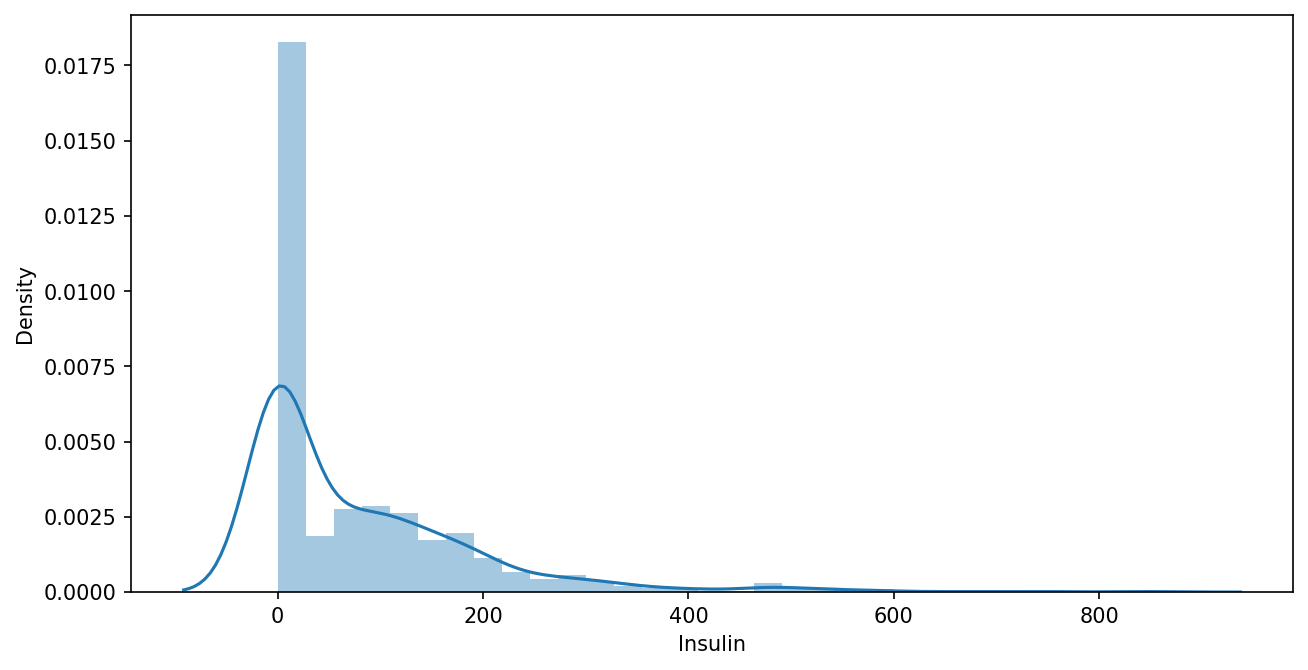

In [17]:
sns.distplot(df['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

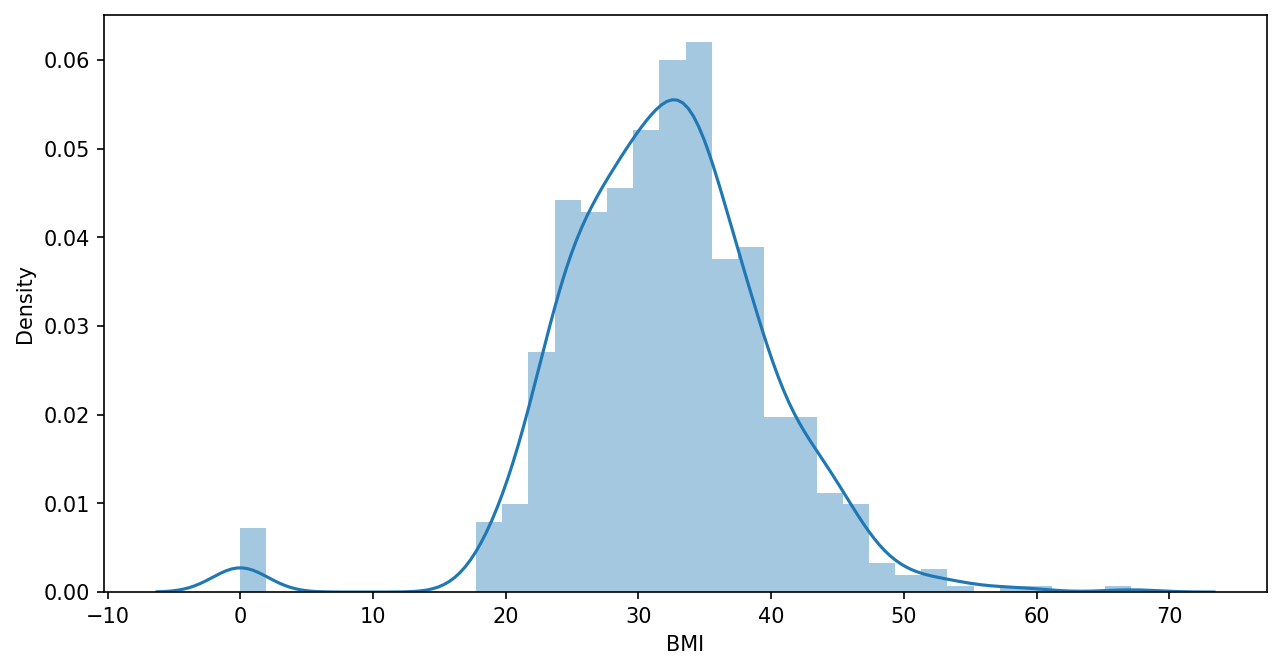

In [18]:
sns.distplot(df['BMI'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

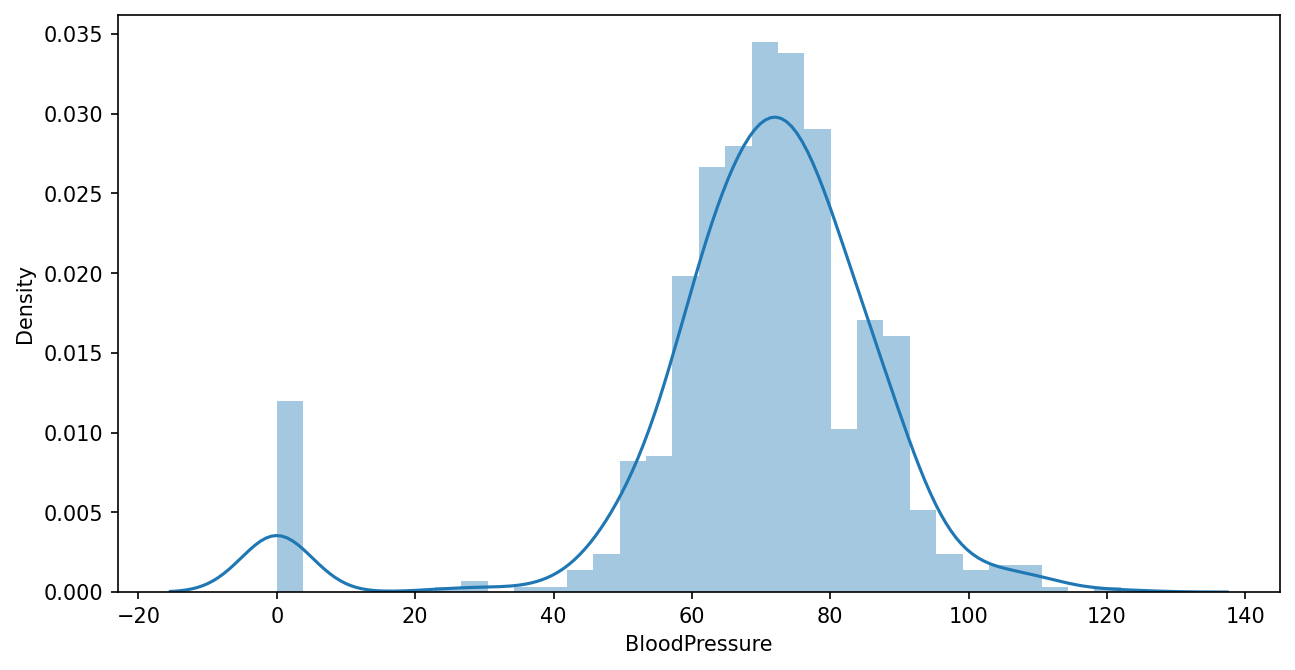

In [19]:
sns.distplot(df['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

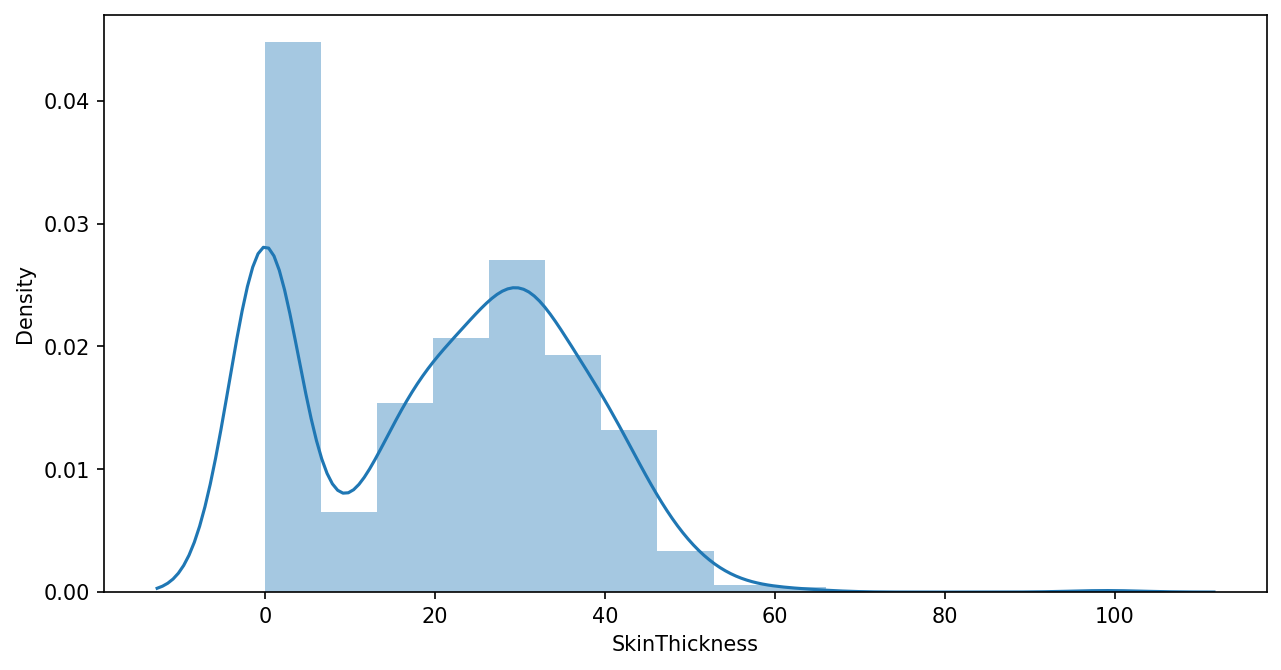

In [20]:
sns.distplot(df['SkinThickness'])

<AxesSubplot:xlabel='Insulin'>

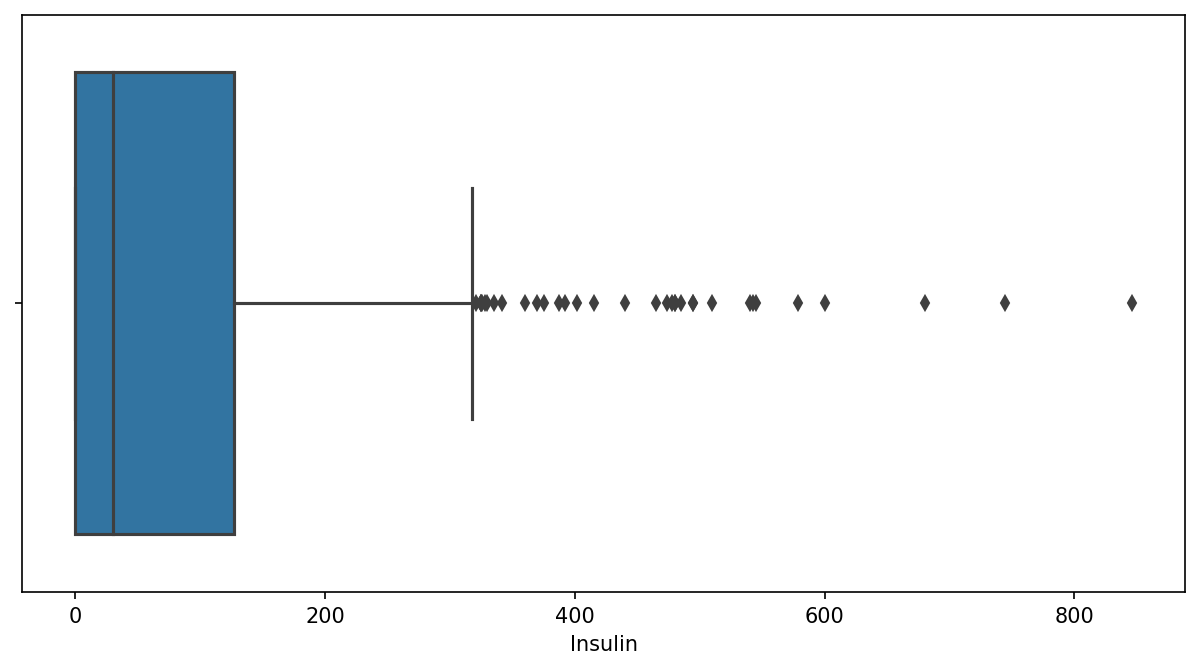

In [21]:
sns.boxplot(df['Insulin'])

# Check null values

In [23]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

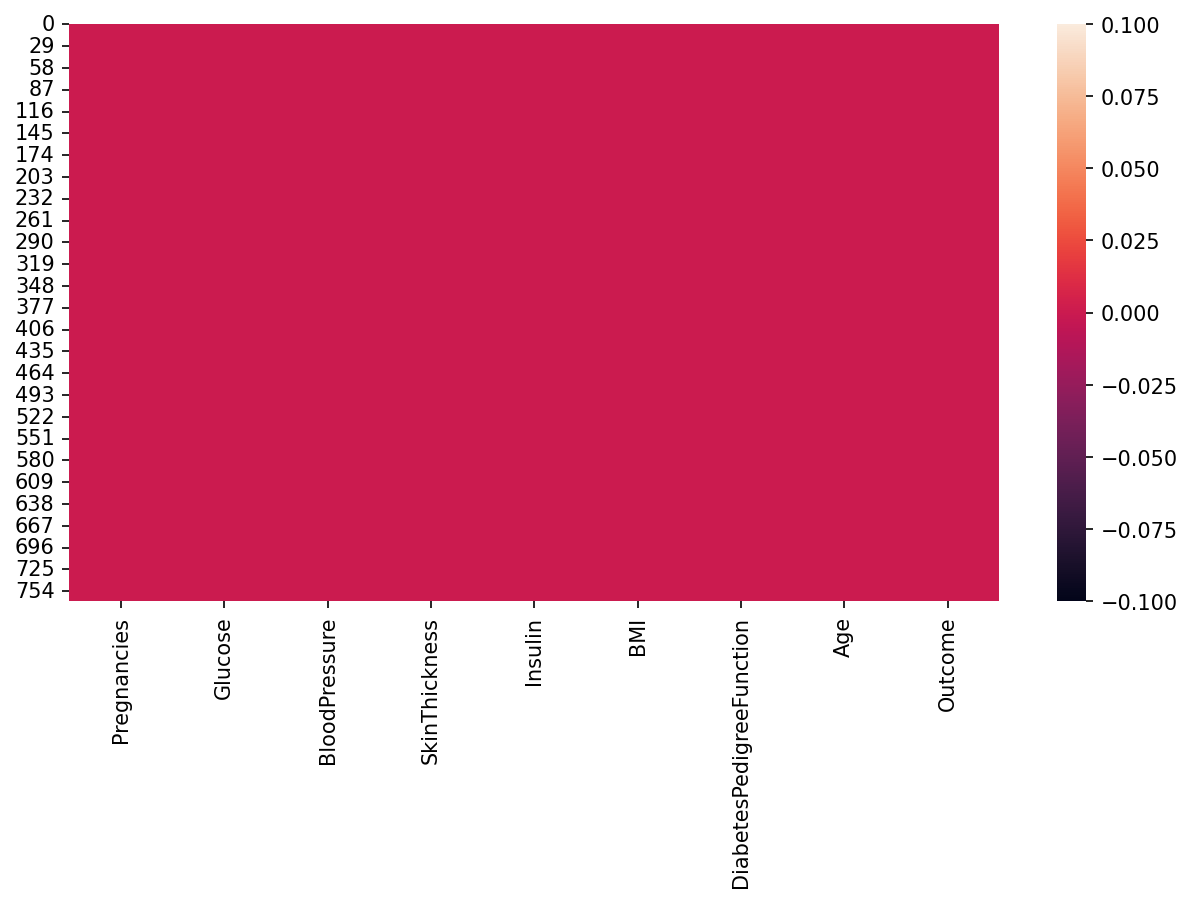

In [24]:
sns.heatmap(df.isna())

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
import numpy as np

In [30]:
df.loc[:,'Glucose':'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0, np.nan)

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

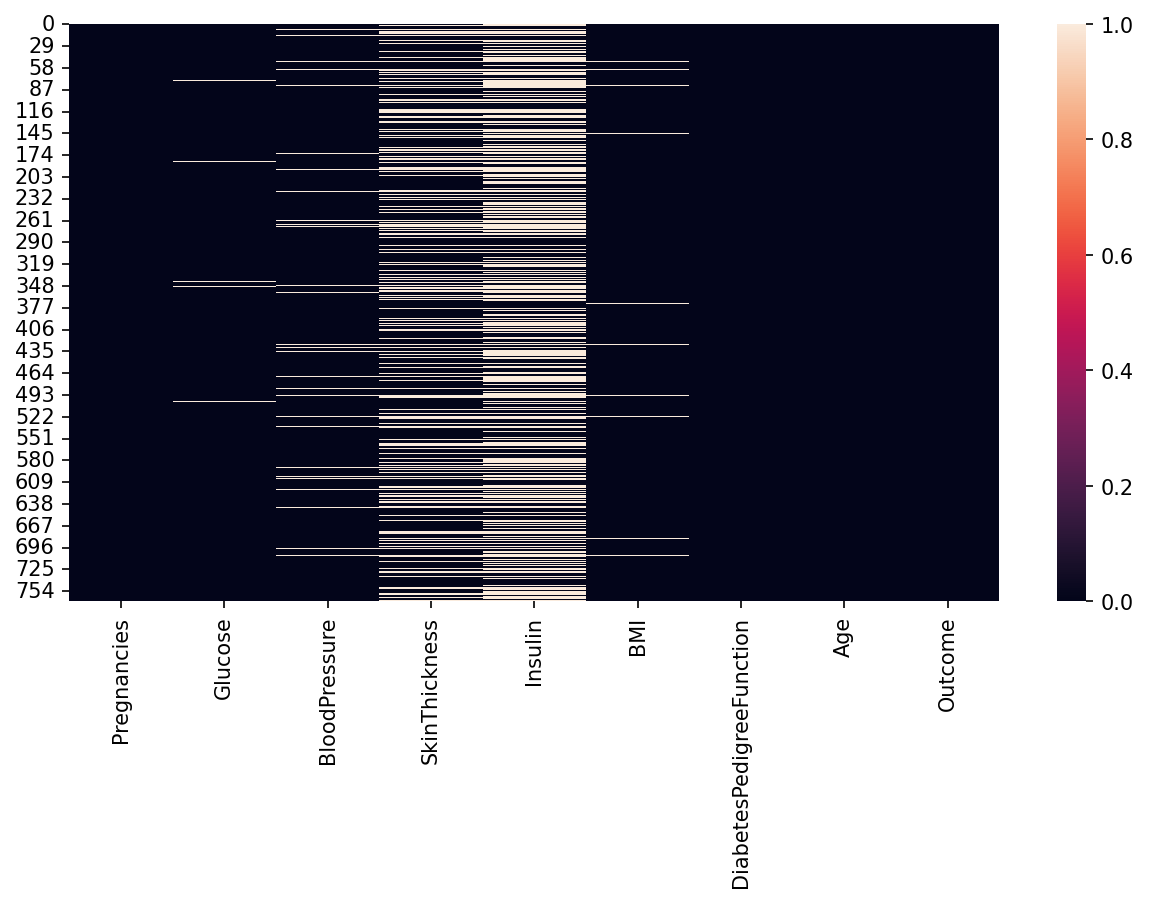

In [32]:
sns.heatmap(df.isna())

In [33]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Correlation analysis

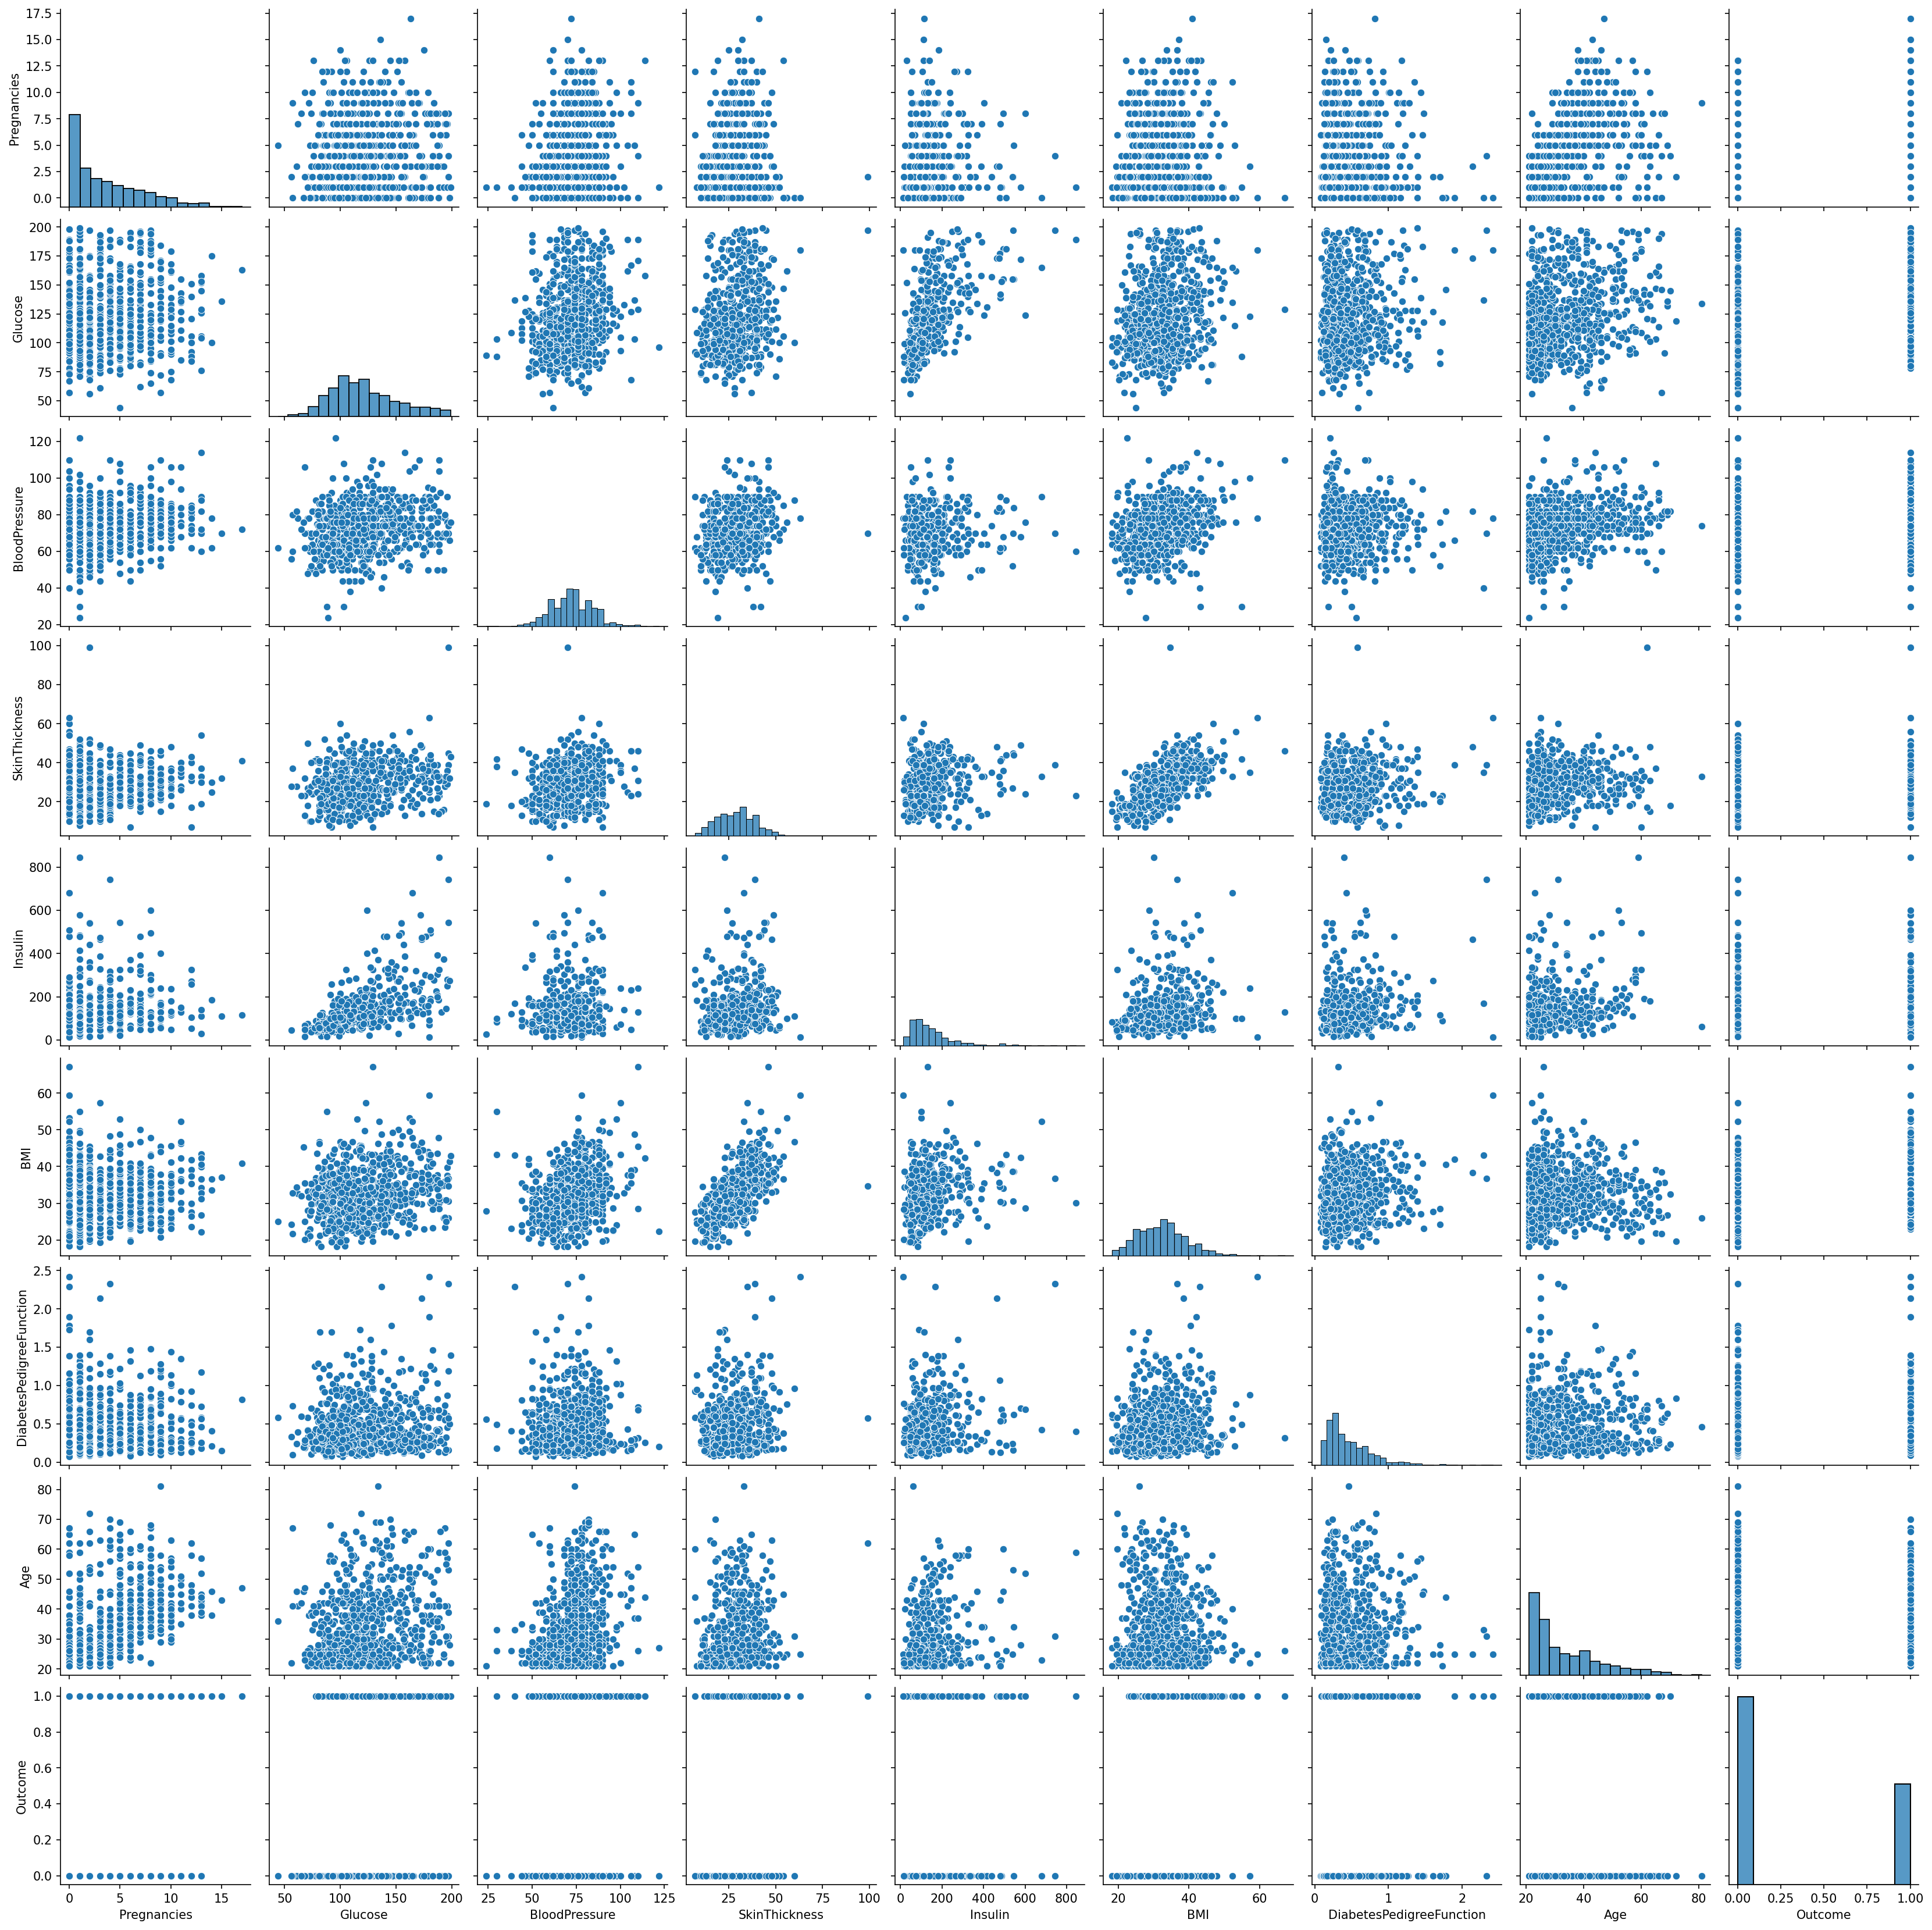

In [36]:
sns.pairplot(df)

<AxesSubplot:>

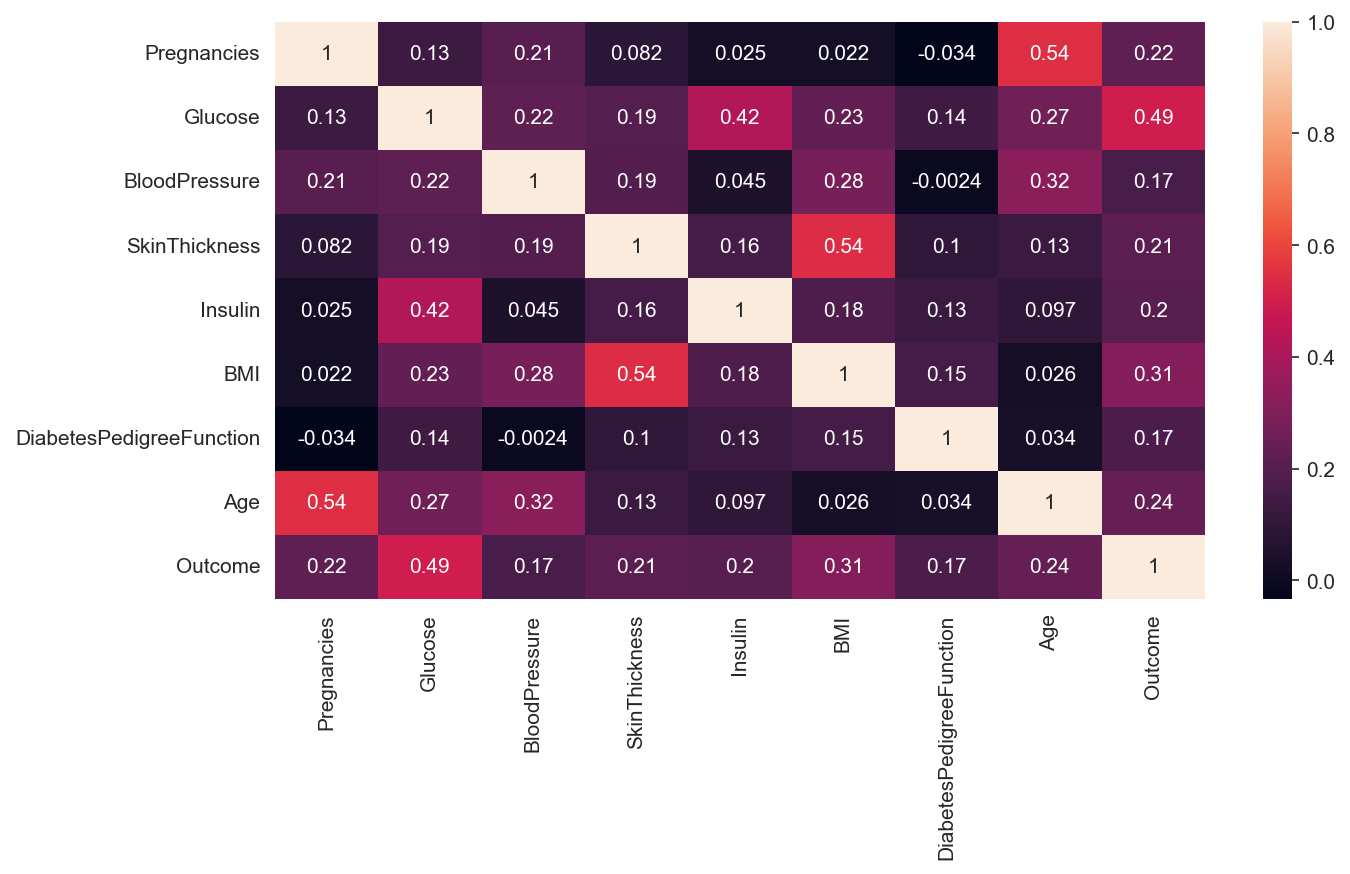

In [74]:
sns.heatmap(df.corr(),annot=True)

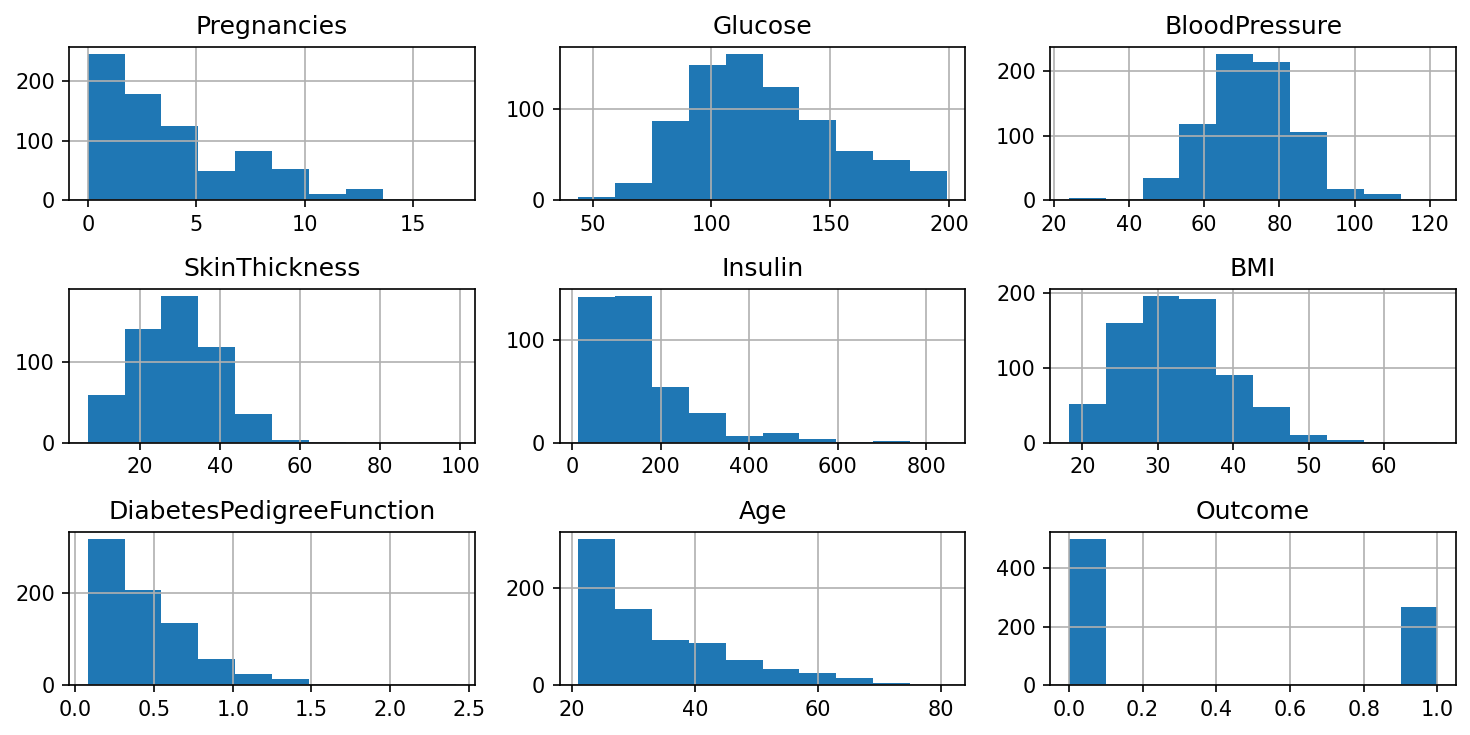

In [40]:
#histogram

df.hist()
plt.tight_layout()

# Missing value imputation

In [43]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [42]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
si = SimpleImputer(strategy='median')

In [46]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [47]:
df[['BloodPressure','SkinThickness','Insulin',
   'BMI']] = si.fit_transform(df[['BloodPressure','SkinThickness','Insulin',
   'BMI']])

In [48]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Model building

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
#Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [54]:
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [55]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [56]:
x['Glucose'].mean()

7.661695352230899e-18

In [57]:
x['Glucose'].std()

1.0006516781401993

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [64]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain,ytrain)
    testac = model.score(xtest,ytest)
    
    print(f"Train AC {trainac}\nTest AC {testac}")

In [65]:
predict(KNeighborsClassifier())

Train AC 0.8177083333333334
Test AC 0.796875


# Hyperparameter Tuning for knn

In [67]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [68]:
trainac

[1.0,
 0.8368055555555556,
 0.8402777777777778,
 0.8072916666666666,
 0.8177083333333334,
 0.8090277777777778,
 0.7899305555555556,
 0.7986111111111112,
 0.7986111111111112,
 0.7881944444444444,
 0.78125,
 0.7777777777777778,
 0.7864583333333334,
 0.7760416666666666,
 0.7725694444444444,
 0.7690972222222222,
 0.7673611111111112,
 0.7777777777777778,
 0.7673611111111112,
 0.7638888888888888]

In [69]:
testac

[0.6927083333333334,
 0.7135416666666666,
 0.765625,
 0.7552083333333334,
 0.796875,
 0.765625,
 0.7552083333333334,
 0.734375,
 0.7552083333333334,
 0.75,
 0.78125,
 0.7864583333333334,
 0.7916666666666666,
 0.7916666666666666,
 0.796875,
 0.78125,
 0.7760416666666666,
 0.7760416666666666,
 0.7708333333333334,
 0.7760416666666666]

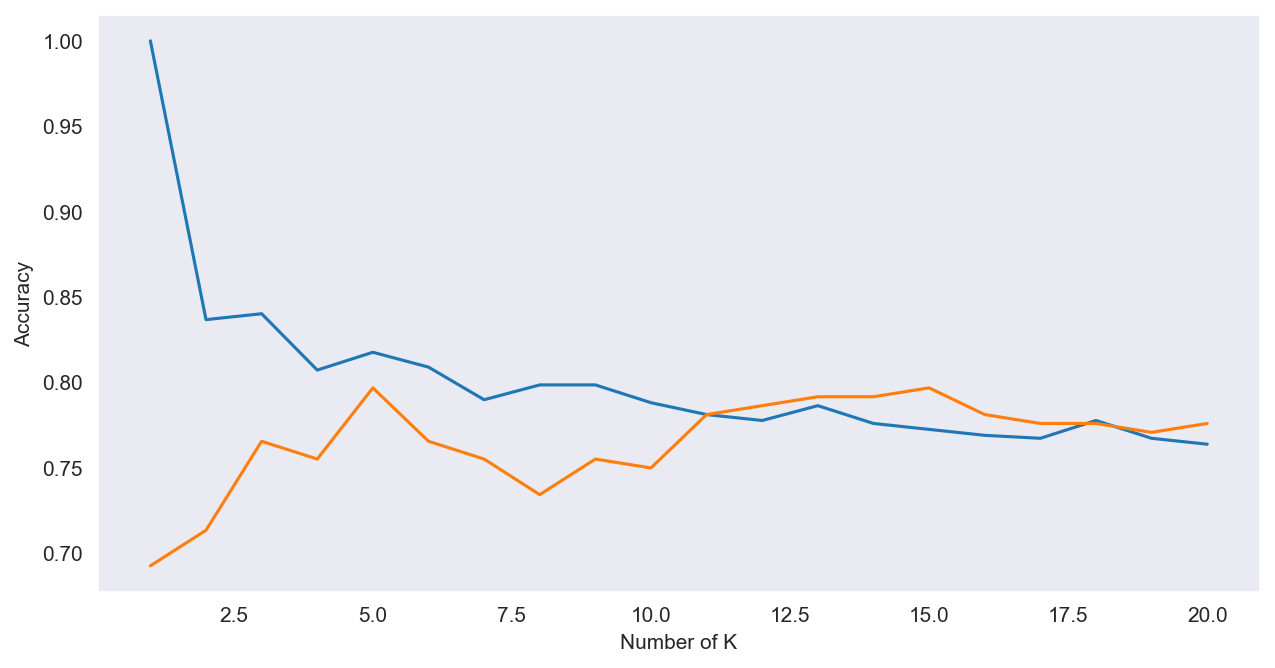

In [71]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [72]:
predict(KNeighborsClassifier(n_neighbors=11))

Train AC 0.78125
Test AC 0.78125
